In [1]:
## An example of unsupervised deep Gaussian process
import numpy as np
import GPy
from pylab import *
from sys import path
np.random.seed(42)
import deepgp
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
import numpy as np
np.random.seed(0)
digits = [0,1,2,3,4]
N_per_digit = 10
Y = []
labels = []
for d in digits:
    imgs = mnist['data'][mnist['target'] == str(d)] 
    Y.append(imgs.sample(n=N_per_digit,axis='rows'))
    labels.append(np.ones(N_per_digit)*d)
Y = np.vstack(Y).astype(np.float64)
labels = np.hstack(labels)
Y /= 255.

In [4]:
num_latent = 2
num_hidden_2 = 5
num_hidden_3 = 5
model = deepgp.DeepGP([Y.shape[1],num_hidden_2,num_latent],
                  Y,
                  kernels=[GPy.kern.RBF(num_hidden_2,ARD=True), 
                           GPy.kern.RBF(num_latent,ARD=False)], 
                  num_inducing=50, back_constraint=False, 
                  encoder_dims=[[100],[100]])

In [5]:
model.obslayer.likelihood.variance[:] = Y.var()*0.01
for layer in model.layers:
    layer.kern.variance.fix(warning=False)
    layer.likelihood.variance.fix(warning=False)

In [6]:
model.optimize(messages=False,max_iters=1000)

In [7]:
model

deepgp.,value,constraints,priors
obslayer.inducing inputs,"(50, 5)",,
obslayer.rbf.variance,1.0,+ve fixed,
obslayer.rbf.lengthscale,"(5,)",+ve,
obslayer.Gaussian_noise.variance,0.000932391168094989,+ve fixed,
obslayer.Kuu_var,"(50,)",+ve,
obslayer.latent space.mean,"(50, 5)",,
obslayer.latent space.variance,"(50, 5)",+ve,
layer_1.inducing inputs,"(50, 2)",,
layer_1.rbf.variance,1.0,+ve fixed,
layer_1.rbf.lengthscale,0.4951011284224522,+ve,


In [8]:
## remain unchange
rows = 10
cols = 20
t=np.linspace(-1, 1, rows*cols)[:, None]
kern = GPy.kern.RBF(1,lengthscale=0.05)
cov = kern.K(t, t)
x = np.random.multivariate_normal(np.zeros(rows*cols), cov, num_latent).T

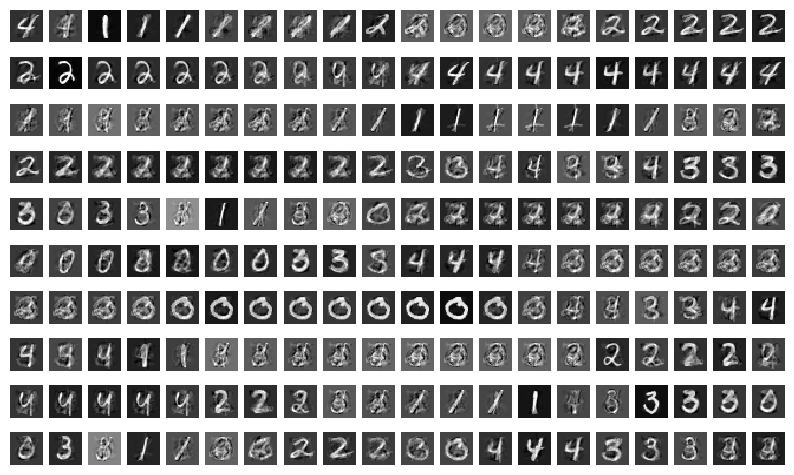

In [9]:
yt = model.predict(x)
fig, axs = plt.subplots(rows,cols,figsize=(10,6))
for i in range(rows):
    for j in range(cols):
        #v = np.random.normal(loc=yt[0][i*cols+j, :], scale=np.sqrt(yt[1][i*cols+j, :]))
        v = yt[0][i*cols+j, :]
        axs[i,j].imshow(v.reshape(28,28), 
                        cmap='gray', interpolation='none',
                        aspect='equal')
        axs[i,j].set_axis_off()